Remapping /home/usuario/Escritorio/BELEN/geonet/GOES_16_Samples/OR_ABI-L2-CMIPF-M3C13_G16_s20183532145334_e20183532156112_c20183532156189.nc
- finished! Time: 36.030741453170776 seconds


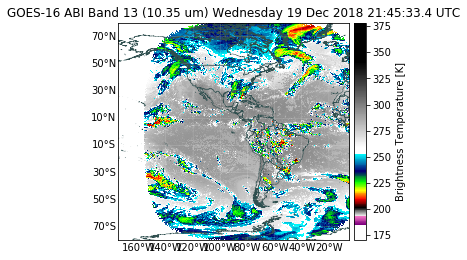

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap # Import the Basemap toolkitimport numpy as np # Import the Numpy package&amp;lt;/pre&amp;gt;
import numpy as np 
from remap import remap # Import the Remap function
 
from cpt_convert import loadCPT # Import the CPT convert function
from matplotlib.colors import LinearSegmentedColormap # Linear interpolation for color maps
 
import datetime # Library to convert julian day to dd-mm-yyyy

# Load the Data =======================================================================================
# Path to the GOES-16 image file
path = '/home/usuario/Escritorio/BELEN/geonet/GOES_16_Samples/OR_ABI-L2-CMIPF-M3C13_G16_s20183532145334_e20183532156112_c20183532156189.nc'

 
# Choose the visualization extent (min lon, min lat, max lon, max lat)
#extent = [-90.0, -40.0, -20, 10.0]
extent = [-175.0, -80.0, -5.0, 80.0]
 
# Choose the image resolution (the higher the number the faster the processing is)
resolution = 2.0
 
# Call the reprojection funcion
grid = remap(path, extent, resolution, 'HDF5')
 
# Read the data returned by the function
data = grid.ReadAsArray()

 
# Plot the Data =======================================================================================
# Create the basemap reference for the Rectangular Projection
bmap = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326)
 
# Draw the countries and Brazilian states shapefiles
#bmap.readshapefile(r'C:\\Users\\Pronostico\\Desktop\\BELEN\\geonet\\Shapefiles\\BRA_adm1','BRA_adm1',linewidth=0.50,color='darkslategray')
bmap.readshapefile('/home/usuario/Escritorio/BELEN/geonet/Countries_Shape/ne_10m_admin_0_countries','ne_10m_admin_0_countries',linewidth=0.50,color='darkslategray')
 
# Draw parallels and meridians
bmap.drawparallels(np.arange(-90.0, 90.0, 20.0), linewidth=0.25, color='white', labels=[True,False,False,True])
bmap.drawmeridians(np.arange(0.0, 360.0, 20.0), linewidth=0.25, color='white', labels=[True,False,False,True])
 
# Converts a CPT file to be used in Python
cpt = loadCPT('/home/usuario/Escritorio/BELEN/geonet/Colortables/IR4AVHRR6.cpt')
# Makes a linear interpolation
cpt_convert = LinearSegmentedColormap('cpt', cpt)
 
# Plot the GOES-16 channel with the converted CPT colors
bmap.imshow(data, origin='upper', cmap=cpt_convert, vmin=170, vmax=378)

# Search for the GOES-16 channel in the file name
Band = (path[path.find("M3C")+3:path.find("_G16")])
# Search for the Scan start in the file name
Start = (path[path.find("_s")+2:path.find("_e")])
Start_Formatted = Start[0:4] + " Day " + Start[4:7] + " - " + Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + "." + Start [13:14] + " UTC"
# Search for the Scan end in the file name
End = (path[path.find("_e")+2:path.find("_c")])
End_Formatted = End[0:4] + " Day " + End[4:7] + " - " + End [7:9] + ":" + End [9:11] + ":" + End [11:13] + "." + End [13:14] + " UTC"
 
if Band == '01':
    Center_WL = '(0.47 um)'
elif Band == '02':
    Center_WL = '(0.64 um)'
elif Band == '03':
    Center_WL = '(0.865 um)'
elif Band == '04':
    Center_WL = '(1.378 um)'
elif Band == '05':
    Center_WL = '(1.61 um)'
elif Band == '06':
    Center_WL = '(2.25 um)'
elif Band == '07':
    Center_WL = '(3.90 um)'
elif Band == '08':
    Center_WL = '(6.19 um)'
elif Band == '09':
    Center_WL = '(6.95 um)'
elif Band == '10':
    Center_WL = '(7.34 um)'
elif Band == '11':
    Center_WL = '(8.50 um)'
elif Band == '12':
    Center_WL = '(9.61 um)'
elif Band == '13':
    Center_WL = '(10.35 um)'
elif Band == '14':
    Center_WL = '(11.20 um)'
elif Band == '15':
    Center_WL = '(12.30 um)'
elif Band == '16':
    Center_WL = '(13.30 um)'

# Converting from julian to dd-mm-yyyy
year = int(Start[0:4])
dayjulian = int(Start[4:7]) - 1
daynormal = datetime.datetime(year,1,1) + datetime.timedelta(dayjulian)
daynormal2 = daynormal.strftime('%A %d %b %Y')
time = Start [7:9] + ":" + Start [9:11] + ":" + Start [11:13] + "." + Start [13:14] + " UTC"
 
# Add a title to the plot
plt.title("GOES-16 ABI Band " + Band + " " + Center_WL + " " + daynormal2 + " " + time)

# Insert the legend at the bottom
bmap.colorbar(location='right', label='Brightness Temperature [K]')

DPI = 300
plt.savefig('/home/usuario/Escritorio/BELEN/geonet/Output/Tutorial6GOES-16_Channel_13.png', dpi=DPI, bbox_inches='tight', pad_inches=0)

# Show the plot
plt.show()

